In [2]:
import gym
import random
import gym_gridworlds
import rlpa2
import mygrid
import sklearn

enva = gym.make("gridenv-v0")
envb = gym.make("gridenv-v1")
envc = gym.make("gridenv-v2")

In [3]:
#To check Chakra Env
e=gym.make('rlpa2:chakra-v0')

/home/moiz/gym/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/home/moiz/gym/gym/logger.py:30: UserWarning: WARN: Environment '<class 'rlpa2.envs.chakra.chakra'>' has deprecated methods '_step' and '_reset' rather than 'step' and 'reset'. Compatibility code invoked. Set _gym_disable_underscore_compat = True to disable this behavior.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [ ]:
#BELOW CODE IS TO CHANGE REWARD TO -0.01 to obtain Results FAST USED Only in case of SARSA(lambda)

# Grid Environment

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import random
class GridWorld(object):
    def __init__(self,n=12,m=12):
        self.grid = np.zeros((m,n))
        self.m = m
        self.n = n
        self.n_actions = 4
        self.stateSpace = [i for i in range(self.m*self.n)]
        self.startstates = [60,72,120,132]
        self.startind = random.randint(0,3)
        self.agentposition = self.startstates[self.startind]
        ##Terminal state info say A
        self.stateSpace.remove(79)#A index
        self.stateSpaceplus = [i for i in range(self.m*self.n)]
        self.actionSpace = {'U':-self.n,'D':self.n,'L':-1,'R':1}
        self.possibleActions = ['U','D','L','R']
        #Rewards
        self.rewards  = np.zeros((m,n))
        
        for i in self.stateSpace:
            x = i // self.m
            y = i%self.n
            self.rewards[x][y]=-0.01
            if y in range(3,9):
                if y == 8:
                    if x in range(2,7):
                        self.rewards[x][y]-=1
                else:
                    if x in range(2,9):
                        self.rewards[x][y]-=1
            if y in range(4,8):
                if y == 7:
                    if x in range(3,6):
                        self.rewards[x][y]-=1
                else:
                    if x in range(3,8):
                        self.rewards[x][y]-=1
            if y in range(5,7):
                if y == 6:
                    if x==4:
                        self.rewards[x][y]-=1
                else:
                    if x in range(4,7):
                        self.rewards[x][y]-=1
        self.rewards[6][7]=10  #A reward
        self.setState(self.agentposition)
                    
                    
        
    def isTerminal(self,state):
        return state in self.stateSpaceplus and state not in self.stateSpace
    def getAgentRnC(self):
        x = self.agentposition // self.m
        y = self.agentposition % self.n
        return x,y
    def setState(self,state):
        x,y = self.getAgentRnC()
#         print(x)
#         print(y)
        self.grid[x][y]=-1
        self.agentposition = state
        x,y = self.getAgentRnC()
        self.grid[x][y]=1
    def offgrid(self,newState,oldState):
        if newState not in self.stateSpaceplus:
#             print("off")
            return True
        elif oldState % self.m == 0 and newState % self.m == self.m - 1:
            return True
        elif oldState % self.m == self.m-1 and newState % self.m == 0:
            return True
        else:
            return False
    def step(self,action):
        action = self.possibleActions[action]
        x,y = self.getAgentRnC()
        
        prob_w = random.uniform(0,1)
        wind = False
#         if(prob_w<=0.5):
#             wind = True
        #stoc = False
        prob_s = random.uniform(0,1)
        action_m = action
        if(prob_s<=0.9):
            action_m = action
        else:
            t = random.randint(1,3)
            c = 1
            for a in self.actionSpace:
                if(a==action):
                    continue
                else:
                    if(c==t):
                        action_m = a
                        break
                    c+=1
                
        resultingstate = self.agentposition + self.actionSpace[action_m]
        trans_state = 0
        reward = 0
        #here Reward will be after windapplication Think 
        #Say you got into terminal by moving west and wind blows you east you
        #remain in the same position
        if not self.offgrid(resultingstate,self.agentposition):
            trans_state = resultingstate
        else:
#             print("is off",resultingstate)
            trans_state = self.agentposition
#             print(trans_state)
#         if(wind):
#             result_wind = trans_state + self.actionSpace['R']
#             if not self.offgrid(result_wind,trans_state):
#                 trans_state = result_wind
#             else:
# #                 print("is off",result_wind)
#                 trans_state = trans_state
            
#                 print(trans_state)
        self.setState(trans_state)
        x_end = trans_state // self.m
        y_end = trans_state % self.n
        isT = self.isTerminal(self.agentposition)
#         print("state")
#         print(trans_state)
#         print(x_end)
#         print(y_end)
    
        return trans_state,self.rewards[x_end][y_end],isT,None
        
    def reset(self):
        self.grid = np.zeros((self.m,self.n))
        self.startind = random.randint(0,3)
        self.agentposition = self.startstates[self.startind]
        return self.agentposition
    def render(self):
        print('-----------------')
        for row in self.grid:
            for col in row:
                if col==0:
                    print('-',end =" ")
                elif col==1 or col==-1:
                    print('X',end =" ")
            print('\n')
        print('------------------')

In [9]:
# env  = gym.make('mygrid:gridenv-v0')
en= GridWorld()
for i in range(12):
    for j in range(12):
        print(en.rewards[i][j],end=" ")
    print("")

-0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 
-0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 
-0.01 -0.01 -0.01 -1.01 -1.01 -1.01 -1.01 -1.01 -1.01 -0.01 -0.01 -0.01 
-0.01 -0.01 -0.01 -1.01 -2.01 -2.01 -2.01 -2.01 -1.01 -0.01 -0.01 -0.01 
-0.01 -0.01 -0.01 -1.01 -2.01 -3.01 -3.01 -2.01 -1.01 -0.01 -0.01 -0.01 
-0.01 -0.01 -0.01 -1.01 -2.01 -3.01 -2.01 -2.01 -1.01 -0.01 -0.01 -0.01 
-0.01 -0.01 -0.01 -1.01 -2.01 -3.01 -2.01 10.0 -1.01 -0.01 -0.01 -0.01 
-0.01 -0.01 -0.01 -1.01 -2.01 -2.01 -2.01 -1.01 -0.01 -0.01 -0.01 -0.01 
-0.01 -0.01 -0.01 -1.01 -1.01 -1.01 -1.01 -1.01 -0.01 -0.01 -0.01 -0.01 
-0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 
-0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 
-0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01 


In [10]:
a=np.asarray([0,2])
b=np.asarray([3,2])

In [11]:
print(round(0.01433,1))

0.0


In [12]:
e=gym.make('rlpa2:chakra-v0')


/home/moiz/gym/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [13]:
print(np.random.normal(loc = (0.07,0.103),scale = 1.))

[0.57152989 0.89397518]


# Q-learning

In [27]:
from collections import defaultdict
def q_learning_run(env,num_episodes,gamma = 0.9 , alpha = 0.15, epsilon = 0.1):
    Q = defaultdict(lambda:np.zeros(4))
#     env.reset()
#     env.render()
    Episodelen = []
    AvgReward = []
    for episode in range(num_episodes):
#         env.render()
        resetedpos = env.reset()
#         print("Start state",resetedpos)
        state = resetedpos
        rew = 0
        length = 0
        while(1):
#             print(state)
            length+=1
            if(np.count_nonzero(Q[state])==0):
                bestaction = random.randint(0,3)
            else:
                bestaction = np.argmax(Q[state])
                
            prob_ba = 1.0 - epsilon + (epsilon/4)
            ba = random.uniform(0,1)
            Action_sel = -1
#             print(ba)
            if(ba<=prob_ba):
                Action_sel = bestaction
            else:
                t =random.randint(1,3)
                c =1
                for a in range(4):
                    if(a==bestaction):
                        continue
                    else:
                        if(c==t):
                            Action_sel = a
                            break
                        else:
                            c+=1
#             print("Best action is",bestaction)
#             print("Action selected ",Action_sel)
#             print("State is",state)
            next_state, reward,isT, _ = env.step(Action_sel)
#             print("State is",next_state)
            rew+=reward
            if(np.count_nonzero(Q[next_state])==0):
                best_n_action = random.randint(0,3)
            else:
                best_n_action = np.argmax(Q[next_state])
            #UPDATING
            d = reward + gamma * Q[next_state][best_n_action] - Q[state][Action_sel]
            Q[state][Action_sel] += alpha * (d)
            if isT:
                break
            state = next_state  
#         print("Length is ",length)
#         print("rew is ",rew)
        AvgReward.append(rew)
        Episodelen.append(length)
    return AvgReward,Episodelen,Q

In [29]:
num_episode = 500
Q_qlearn = defaultdict(lambda:np.zeros(4))
r_qlearn = np.zeros(num_episode)
l_qlearn = np.zeros(num_episode)

num_runs = 50
smooth = 5
for i in range(num_runs):
    print(i)
    
    r,l,q = q_learning_run(enva,num_episode)
    print("Max is ",np.max(l))
    for j in range(num_episode):
        r_qlearn[j]=(r_qlearn[j]*(i)+r[j])/(i+1)
        l_qlearn[j]=(l_qlearn[j]*(i)+l[j])/(i+1)
    for k in range(144):
        for a in range(4):
            Q_qlearn[k][a]=(Q_qlearn[k][a]*(i)+q[k][a])/(i+1)
        


0
Max is  342
1
Max is  425
2
Max is  243
3
Max is  300
4
Max is  829
5
Max is  918
6
Max is  1280
7
Max is  1067
8
Max is  848
9
Max is  554
10
Max is  662
11
Max is  551
12
Max is  618
13
Max is  534
14
Max is  732
15
Max is  500
16
Max is  294
17
Max is  775
18
Max is  421
19
Max is  579
20
Max is  665
21
Max is  281
22
Max is  694
23
Max is  800
24
Max is  280
25
Max is  336
26
Max is  338
27
Max is  451
28
Max is  1000
29
Max is  558
30
Max is  780
31
Max is  560
32
Max is  552
33
Max is  431
34
Max is  1045
35
Max is  697
36
Max is  869
37
Max is  371
38
Max is  754
39
Max is  303
40
Max is  577
41
Max is  321
42
Max is  339
43
Max is  227
44
Max is  1157
45
Max is  750
46
Max is  852
47
Max is  336
48
Max is  459
49
Max is  304


In [175]:
# print(np.shape(r_qlearn))
# print(np.shape(l_qlearn))
# r_qlearn_s = np.zeros(int(num_episode/smooth))
# l_qlearn_s = np.zeros(int(num_episode/smooth))

# k = 0
# for i in range(num_episode):
#     r = 0
#     l = 0
#     j = 0
#     i = i*5
#     if(i==num_episode):
#         break
#     for j in range(smooth):
#         print("smooth",i)
#         r=(r*j+r_qlearn[i])/(j+1)
#         l=(l*j+l_qlearn[i])/(j+1)
#         i+=1
#     print("k and i",k,i)
#     r_qlearn_s[k]=r
#     l_qlearn_s[k]=l
#     k+=1
        

In [30]:
r_qllearn = np.zeros(num_episode)
for i in range(num_episode):
        r_qllearn[i]=r_qlearn[i]/l_qlearn[i]

In [31]:
print(r_qlearn)

[-2.9   0.96  1.   -0.84 -1.16  2.66  1.14  1.42 -0.32  1.26  2.9   2.
  1.58  1.64  3.36  3.94  3.44  4.5   3.78  3.52  2.06  3.52  4.78  4.76
  5.74  3.54  4.6   4.84  3.78  4.84  3.92  6.42  5.62  4.54  7.    6.54
  6.1   6.98  3.52  6.54  6.88  6.14  6.92  4.88  7.1   7.    6.44  6.1
  6.44  8.26  6.22  6.22  7.76  7.8   7.4   7.82  6.8   7.8   7.56  5.34
  7.68  7.44  7.36  8.3   7.42  6.84  6.7   7.62  6.34  7.2   6.02  7.72
  7.72  8.5   8.04  7.62  8.5   7.7   8.5   7.18  6.54  7.5   7.34  6.42
  8.18  7.08  9.06  7.82  8.8   7.96  8.2   7.96  7.84  8.26  8.46  8.88
  7.86  8.62  8.8   7.78  7.66  8.74  8.4   7.88  8.54  6.36  7.42  7.24
  8.7   8.66  6.74  7.02  7.42  7.48  8.46  5.86  8.46  8.06  6.78  6.84
  8.1   8.14  8.72  8.12  7.06  8.44  8.92  8.96  7.84  7.18  8.66  8.22
  7.92  8.4   6.96  8.94  7.7   7.18  8.16  8.7   8.18  9.02  9.26  8.3
  8.4   7.38  9.48  8.46  7.64  8.76  8.38  8.1   7.1   7.    6.82  8.54
  8.08  9.2   9.18  8.54  7.82  7.66  8.46  7.42  8.98 

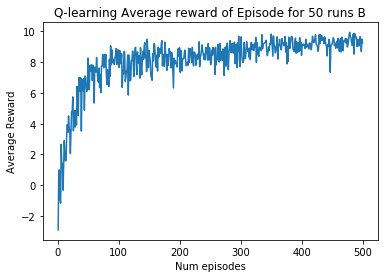

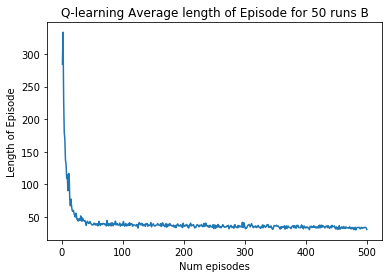

In [34]:
T = []
# num_episode=100
for i in range(num_episode):
    T.append(i+1)
plt.title("Q-learning Average reward of Episode for 50 runs B")
plt.xlabel("Num episodes")
# plt.ylim(-10,10)
plt.ylabel("Average Reward")
plt.plot(T,r_qlearn)
plt.show()
plt.title("Q-learning Average length of Episode for 50 runs B")
plt.xlabel("Num episodes")
plt.ylabel("Length of Episode")
plt.plot(T,l_qlearn)
plt.show()

In [180]:
Q_bqlearn = Q_qlearn

In [173]:
Q_aqlearn = Q_qlearn

In [163]:
Q_cqlearn = Q_qlearn

In [183]:
from unicodedata import *
for x in range(12):
    for y in range(12):
        if(x==2 and y==9):
            print("G",end="  |  ")
            continue
        if(np.max(Q_qlearn[x*12+y])==0):
            a=random.randint(0,3)
        else:
            a = np.argmax(Q_bqlearn[x*12+y])
        if(a==0):
            print(lookup("UPWARDS ARROW"),end="  |  ")
        if(a==1):
            print(lookup("DOWNWARDS ARROW"),end="  |  ")
        if(a==2):
            print(lookup("LEFTWARDS ARROW"),end="  |  ")
        if(a==3):
            print(lookup("RIGHTWARDS ARROW"),end="  |  ")
    print('\n')
    
            

↑  |  →  |  →  |  →  |  →  |  →  |  →  |  →  |  ↓  |  ↓  |  ↓  |  ↓  |  

→  |  →  |  ↑  |  ↑  |  ↑  |  →  |  →  |  →  |  ↓  |  ↓  |  ↓  |  ↓  |  

↑  |  ↑  |  ↑  |  ↑  |  ↑  |  ↑  |  ↑  |  →  |  →  |  G  |  ←  |  ←  |  

↑  |  ↑  |  ←  |  ↑  |  ↑  |  ↑  |  →  |  →  |  ↑  |  ↑  |  ↑  |  ↑  |  

↑  |  ↑  |  ←  |  ←  |  ←  |  ↑  |  →  |  →  |  →  |  ↑  |  ↑  |  ↑  |  

↑  |  ←  |  ←  |  ←  |  ←  |  →  |  →  |  →  |  →  |  ↑  |  ↑  |  ↑  |  

↓  |  ↓  |  ←  |  ←  |  ←  |  →  |  →  |  →  |  →  |  ↑  |  ↑  |  ↑  |  

↓  |  ↓  |  ←  |  ←  |  ↓  |  ↓  |  →  |  →  |  ↓  |  →  |  ↑  |  ↑  |  

↓  |  ↓  |  ↓  |  ↓  |  ↓  |  ↓  |  ↓  |  ↓  |  →  |  →  |  ↑  |  ↑  |  

↓  |  ↓  |  ↓  |  →  |  ↓  |  ↓  |  →  |  →  |  →  |  →  |  ↑  |  ↑  |  

→  |  →  |  →  |  →  |  →  |  →  |  →  |  →  |  →  |  ↑  |  ↑  |  ↑  |  

→  |  →  |  →  |  →  |  →  |  ↑  |  ↑  |  ↑  |  ↑  |  ↑  |  ↑  |  ↑  |  



In [235]:
from unicodedata import *

mat = np.zeros((12,12))
for x in range(12):
    for y in range(12):
        mat[x,y]=-1
        if y in range(3,9):
            if y == 8:
                if x in range(2,7):
                    mat[x,y]=3
            else:
                if x in range(2,9):
                    mat[x,y]=3
        if y in range(4,8):
            if y == 7:
                if x in range(3,6):
                    mat[x,y]=2
            else:
                if x in range(3,8):
                    mat[x,y]=2
        if y in range(5,7):
            if y == 6:
                if x==4:
                    mat[x,y]=1
            else:
                if x in range(4,7):
                    mat[x,y]=1


mat[6,7]=4
fig,ax = plt.subplots()
arrow = {0:"↑",1:"↓",2:"←",3:"→"}
ax.matshow(mat)
for x in range(12):
    for y in range(12):
        if(np.max(Q_cqlearn[x*12+y])==0):
            a=random.randint(0,3)
        else:
            a = np.argmax(Q_cqlearn[x*12+y])
        if(mat[x,y]==4):
            continue
        ax.text(y,x,arrow[a],va="center",ha="center")
plt.show()

# SARSA

In [239]:
from collections import defaultdict
def sarsa(env,num_episodes,gamma = 0.9 , alpha = 0.15, epsilon = 0.1):
    Q = defaultdict(lambda:np.zeros(4))
    env.reset()
#     env.render()
    Episodelen = []
    AvgReward = []
    for episode in range(num_episodes):
#         env.render()
        resetedpos = env.reset()
#         print("Start state",resetedpos)
        state = resetedpos
        rew = 0
        length = 0
        while(1):
            length+=1
            if(np.count_nonzero(Q[state])==0):
                bestaction = random.randint(0,3)
            else:
                bestaction = np.argmax(Q[state])
            prob_ba = 1.0 - epsilon + (epsilon/4)
            ba = random.uniform(0,1)
            Action_sel = -1
            if(ba<=prob_ba):
                Action_sel = bestaction
            else:
                t =random.randint(1,3)
                c =1
                for a in range(4):
                    if(a==bestaction):
                        continue
                    else:
                        if(c==t):
                            Action_sel = a
                            break
                        else:
                            c+=1
            next_state, reward,isT, _ = env.step(Action_sel)
            rew+=reward
            if(np.count_nonzero(Q[next_state])==0):
                best_n_action = random.randint(0,3)
            else:
                best_n_action = np.argmax(Q[next_state])
            prob_ba = 1.0 - epsilon + (epsilon/4)
            ba = random.uniform(0,1)
            Action_n_sel = -1
            if(ba<=prob_ba):
                Action_n_sel = best_n_action
            else:
                t =random.randint(1,3)
                c =1
                for a in range(4):
                    if(a==best_n_action):
                        continue
                    else:
                        if(c==t):
                            Action_n_sel = a
                            break
                        else:
                            c+=1
            Q[state][Action_sel] += alpha * (reward + gamma * Q[next_state][Action_n_sel] - Q[state][Action_sel])
            if isT:
                break
            state = next_state
        AvgReward.append(rew)
        Episodelen.append(length)
    return AvgReward,Episodelen,Q

In [240]:
num_episode = 100
Q_sarsa = defaultdict(lambda:np.zeros(4))
r_sarsa = np.zeros(num_episode)
l_sarsa = np.zeros(num_episode)

num_runs = 50
smooth = 5
for i in range(num_runs):
    print(i)
    
    r,l,q = sarsa(envc,num_episode)
    print("Max is ",np.max(l))
    for j in range(num_episode):
        r_sarsa[j]=(r_sarsa[j]*(i)+r[j])/(i+1)
        l_sarsa[j]=(l_sarsa[j]*(i)+l[j])/(i+1)
    for k in range(144):
        for a in range(4):
            Q_sarsa[k][a]=(Q_sarsa[k][a]*(i)+q[k][a])/(i+1)
        


0
Max is  28112
1
Max is  138252
2
Max is  286113
3
Max is  41663
4
Max is  4788
5
Max is  12305
6
Max is  5441
7
Max is  74818
8
Max is  22940
9
Max is  46609
10
Max is  7196
11
Max is  1401946
12
Max is  145083
13
Max is  80450
14
Max is  18765
15
Max is  7797186
16
Max is  58128
17
Max is  32055
18
Max is  41357
19
Max is  8069319
20
Max is  18526
21
Max is  228459
22
Max is  25231
23
Max is  81170
24
Max is  2834
25
Max is  1484617
26
Max is  17914
27
Max is  24400
28
Max is  153780
29
Max is  55000
30
Max is  62152
31
Max is  11270
32
Max is  35999
33
Max is  4319055
34
Max is  6944244
35
Max is  1600659
36
Max is  28616
37
Max is  222494
38
Max is  2376671
39
Max is  2008195
40
Max is  8230
41
Max is  1391576
42
Max is  105721
43
Max is  142690
44
Max is  21851
45
Max is  21139
46
Max is  46283
47
Max is  2033266
48
Max is  171234
49
Max is  12454803


In [241]:
r_lsarsa = np.zeros(num_episode)
for i in range(num_episode):
        r_lsarsa[i]=r_sarsa[i]/l_sarsa[i]

In [242]:
a =[0.1,0.1]
np.linalg.norm((a/np.linalg.norm(a))*0.025)

0.025

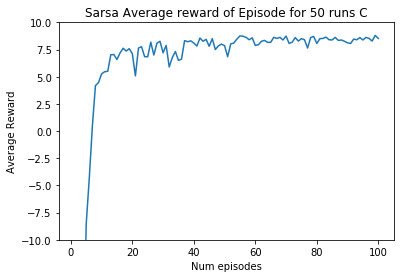

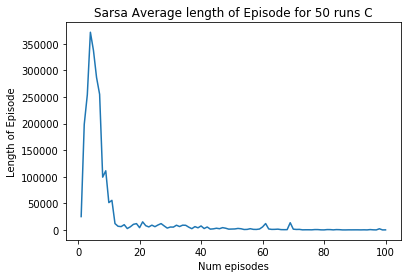

In [245]:
T = []
# num_episode=100
for i in range(num_episode):
    T.append(i+1)
plt.title("Sarsa Average reward of Episode for 50 runs C")
plt.xlabel("Num episodes")
plt.ylabel("Average Reward")
plt.plot(T,r_sarsa)
plt.show()
plt.title("Sarsa Average length of Episode for 50 runs C")
plt.xlabel("Num episodes")
plt.ylabel("Length of Episode")
plt.plot(T,l_sarsa)
plt.show()

In [246]:
Q_csarsa = Q_sarsa

In [195]:
Q_bsarsa = Q_sarsa

In [190]:
Q_asarsa = Q_sarsa

In [249]:
# print(Q_qlearn)

In [258]:
from unicodedata import *
for x in range(12):
    for y in range(12):
        if(np.max(Q_qlearn[x*12+y])==0):
            a=random.randint(0,3)
        else:
            a = np.argmax(Q_qlearn[x*12+y])
        if(a==0):
            print(lookup("UPWARDS ARROW"),end="  |  ")
        if(a==1):
            print(lookup("DOWNWARDS ARROW"),end="  |  ")
        if(a==2):
            print(lookup("LEFTWARDS ARROW"),end="  |  ")
        if(a==3):
            print(lookup("RIGHTWARDS ARROW"),end="  |  ")
    print('\n')
    
            

→  |  →  |  →  |  →  |  →  |  →  |  →  |  →  |  →  |  →  |  ↑  |  ↓  |  

→  |  →  |  →  |  →  |  ↑  |  ↑  |  ↑  |  ↑  |  ↑  |  →  |  ↑  |  ↑  |  

↑  |  ↑  |  ↑  |  ↑  |  ↑  |  ↑  |  ↑  |  ↑  |  ↑  |  ↑  |  ↑  |  ↑  |  

↑  |  ↑  |  ↑  |  ↑  |  ↑  |  ↑  |  ↑  |  →  |  →  |  ↑  |  ↑  |  ↑  |  

↑  |  ↑  |  ←  |  ←  |  ↑  |  ↑  |  →  |  →  |  →  |  ↑  |  ↑  |  ↑  |  

↑  |  ↑  |  ←  |  ←  |  ←  |  →  |  ↓  |  →  |  →  |  ↑  |  ↑  |  ↑  |  

↓  |  ←  |  ←  |  ←  |  ↓  |  →  |  →  |  →  |  →  |  ↑  |  ↑  |  ↑  |  

↓  |  ↓  |  ←  |  ↓  |  ↓  |  ↓  |  →  |  →  |  ↓  |  →  |  ↑  |  ↑  |  

↓  |  ↓  |  ↓  |  ↓  |  ↓  |  ↓  |  ↓  |  →  |  ↑  |  ↑  |  ↑  |  ↑  |  

↓  |  ↓  |  ↓  |  →  |  →  |  →  |  →  |  →  |  →  |  ↑  |  ↑  |  ↑  |  

→  |  →  |  →  |  →  |  →  |  →  |  →  |  →  |  ↑  |  ↑  |  ↑  |  ↑  |  

→  |  →  |  →  |  →  |  →  |  →  |  ↑  |  ↑  |  ↑  |  ↑  |  ↑  |  ↑  |  



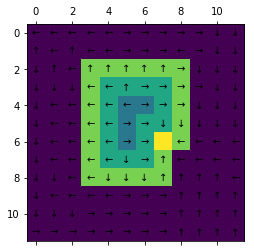

In [248]:
from unicodedata import *

mat = np.zeros((12,12))
for x in range(12):
    for y in range(12):
        mat[x,y]=-1
        if y in range(3,9):
            if y == 8:
                if x in range(2,7):
                    mat[x,y]=3
            else:
                if x in range(2,9):
                    mat[x,y]=3
        if y in range(4,8):
            if y == 7:
                if x in range(3,6):
                    mat[x,y]=2
            else:
                if x in range(3,8):
                    mat[x,y]=2
        if y in range(5,7):
            if y == 6:
                if x==4:
                    mat[x,y]=1
            else:
                if x in range(4,7):
                    mat[x,y]=1


mat[6,7]=4
fig,ax = plt.subplots()
arrow = {0:"↑",1:"↓",2:"←",3:"→"}
ax.matshow(mat)
for x in range(12):
    for y in range(12):
        if(np.max(Q_csarsa[x*12+y])==0):
            a=random.randint(0,3)
        else:
            a = np.argmax(Q_csarsa[x*12+y])
        if(mat[x,y]==4):
            continue
        ax.text(y,x,arrow[a],va="center",ha="center")
plt.show()

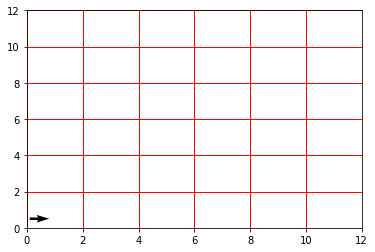

In [28]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(2)
ax = fig.add_subplot(111)
# ax.quiver(485.0, 759.0, 485.0, 764.0,angles='xy', scale_units='xy', scale = 1)
ax.quiver(0.1, 0.5, 0.8 - 0.1, 0.5 - 0.5, 
          angles='xy', scale_units='xy', scale = 1)
ax.axis([0,12,0,12])
plt.grid(color='r', linestyle='-', linewidth=1)
plt.draw()
plt.show()

# Sarsa(lambda)

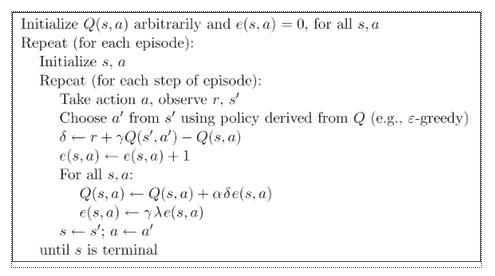

In [14]:
from collections import defaultdict
def sarsal(env,num_episodes,lamb,gamma = 0.9, alpha = 0.15, epsilon = 0.1):
    Q = defaultdict(lambda:np.zeros(4))
    E = defaultdict(lambda:np.zeros(4))
    env.reset()
#     env.render()
    Episodelen = []
    AvgReward = []
    for episode in range(num_episodes):
#         env.render()
        resetedpos = env.reset()
#         print("Start state",resetedpos)
        state = resetedpos
        rew = 0
        length = 0
        while(1):
            length+=1
            if(np.count_nonzero(Q[state])==0):
                bestaction = random.randint(0,3)
            else:
                bestaction = np.argmax(Q[state])
            prob_ba = 1.0 - epsilon + (epsilon/4)
            ba = random.uniform(0,1)
            Action_sel = -1
            if(ba<=prob_ba):
                Action_sel = bestaction
            else:
                t =random.randint(1,3)
                c =1
                for a in range(4):
                    if(a==bestaction):
                        continue
                    else:
                        if(c==t):
                            Action_sel = a
                            break
                        else:
                            c+=1
            next_state, reward,isT, _ = env.step(Action_sel)
            rew+=reward
            if(np.count_nonzero(Q[next_state])==0):
                best_n_action = random.randint(0,3)
            else:
                best_n_action = np.argmax(Q[next_state])
            prob_ba = 1.0 - epsilon + (epsilon/4)
            ba = random.uniform(0,1)
            Action_n_sel = -1
            if(ba<=prob_ba):
                Action_n_sel = best_n_action
            else:
                t =random.randint(1,3)
                c =1
                for a in range(4):
                    if(a==best_n_action):
                        continue
                    else:
                        if(c==t):
                            Action_n_sel = a
                            break
                        else:
                            c+=1
            delta = reward + gamma * Q[next_state][Action_n_sel] - Q[state][Action_sel]
            E[state][Action_sel]+=1
            for s,_ in Q.items() :
                Q[s][:] += alpha * delta * E[s][:]
                E[s][:] = gamma*lamb*E[s][:]
            if isT:
                break
            state = next_state
        AvgReward.append(rew)
        Episodelen.append(length)
    return AvgReward,Episodelen,Q

In [15]:
num_episode = 25
Q_sarsal1 = defaultdict(lambda:np.zeros(4))
r_sarsal1 = np.zeros(num_episode)
l_sarsal1 = np.zeros(num_episode)

num_runs = 50
smooth = 5
for i in range(num_runs):
#     print(i)
    
    r,l,q = sarsal(en,num_episode,0)
    print("Max is ",np.max(l))
    for j in range(num_episode):
        r_sarsal1[j]=(r_sarsal1[j]*(i)+r[j])/(i+1)
        l_sarsal1[j]=(l_sarsal1[j]*(i)+l[j])/(i+1)
    for k in range(144):
        for a in range(4):
            Q_sarsal1[k][a]=(Q_sarsal1[k][a]*(i)+q[k][a])/(i+1)

Max is  1287
Max is  1481
Max is  853
Max is  1483
Max is  610
Max is  5867
Max is  892
Max is  4226
Max is  690
Max is  1454
Max is  1986
Max is  990
Max is  628
Max is  1776
Max is  717
Max is  4571
Max is  773
Max is  1005
Max is  796
Max is  1102
Max is  4803
Max is  2444
Max is  1243
Max is  653
Max is  1225
Max is  9018
Max is  966
Max is  585
Max is  1115
Max is  1646
Max is  658
Max is  734
Max is  915
Max is  1298
Max is  839
Max is  502
Max is  744
Max is  1356
Max is  4443
Max is  598
Max is  754
Max is  757
Max is  669
Max is  881
Max is  623
Max is  2202
Max is  940
Max is  648
Max is  676
Max is  897


In [16]:
num_episode = 25
Q_sarsal2 = defaultdict(lambda:np.zeros(4))
r_sarsal2 = np.zeros(num_episode)
l_sarsal2 = np.zeros(num_episode)

num_runs = 50
smooth = 5
for i in range(num_runs):
#     print(i)
    
    r,l,q = sarsal(en,num_episode,0.3)
    print("Max is ",np.max(l))
    for j in range(num_episode):
        r_sarsal2[j]=(r_sarsal2[j]*(i)+r[j])/(i+1)
        l_sarsal2[j]=(l_sarsal2[j]*(i)+l[j])/(i+1)
    for k in range(144):
        for a in range(4):
            Q_sarsal2[k][a]=(Q_sarsal2[k][a]*(i)+q[k][a])/(i+1)

Max is  892
Max is  7094
Max is  660
Max is  639
Max is  762
Max is  726
Max is  840
Max is  841
Max is  947
Max is  1734
Max is  516
Max is  1021
Max is  1147
Max is  1066
Max is  534
Max is  585
Max is  944
Max is  1394
Max is  662
Max is  676
Max is  815
Max is  833
Max is  669
Max is  598
Max is  3617
Max is  881
Max is  1881
Max is  996
Max is  4747
Max is  631
Max is  879
Max is  944
Max is  2300
Max is  709
Max is  981
Max is  667
Max is  3542
Max is  739
Max is  1709
Max is  730
Max is  916
Max is  1181
Max is  817
Max is  1115
Max is  1489
Max is  657
Max is  1213
Max is  1144
Max is  703
Max is  1279


In [17]:
num_episode = 25
Q_sarsal3 = defaultdict(lambda:np.zeros(4))
r_sarsal3 = np.zeros(num_episode)
l_sarsal3 = np.zeros(num_episode)

num_runs = 50
smooth = 5
for i in range(num_runs):
#     print(i)
    
    r,l,q = sarsal(en,num_episode,0.5)
    print("Max is ",np.max(l))
    for j in range(num_episode):
        r_sarsal3[j]=(r_sarsal3[j]*(i)+r[j])/(i+1)
        l_sarsal3[j]=(l_sarsal3[j]*(i)+l[j])/(i+1)
    for k in range(144):
        for a in range(4):
            Q_sarsal3[k][a]=(Q_sarsal3[k][a]*(i)+q[k][a])/(i+1)

Max is  373
Max is  904
Max is  667
Max is  452
Max is  678
Max is  542
Max is  811
Max is  1225
Max is  1692
Max is  1118
Max is  965
Max is  2122
Max is  967
Max is  3453
Max is  1583
Max is  1276
Max is  933
Max is  1523
Max is  1319
Max is  1940
Max is  1244
Max is  433
Max is  1628
Max is  728
Max is  6461
Max is  831
Max is  698
Max is  782
Max is  1598
Max is  1195
Max is  575
Max is  1836
Max is  538
Max is  1300
Max is  1319
Max is  6429
Max is  784
Max is  9300
Max is  492
Max is  1638
Max is  554279
Max is  543
Max is  1174
Max is  2269
Max is  854
Max is  666
Max is  1822
Max is  1485
Max is  1231
Max is  803


In [18]:
num_episode = 25
Q_sarsal4 = defaultdict(lambda:np.zeros(4))
r_sarsal4 = np.zeros(num_episode)
l_sarsal4 = np.zeros(num_episode)

num_runs = 50
smooth = 5
for i in range(num_runs):
#     print(i)
    
    r,l,q = sarsal(en,num_episode,0.9)
    print("Max is ",np.max(l))
    for j in range(num_episode):
        r_sarsal4[j]=(r_sarsal4[j]*(i)+r[j])/(i+1)
        l_sarsal4[j]=(l_sarsal4[j]*(i)+l[j])/(i+1)
    for k in range(144):
        for a in range(4):
            Q_sarsal4[k][a]=(Q_sarsal4[k][a]*(i)+q[k][a])/(i+1)

Max is  10997
Max is  2607
Max is  6013
Max is  13886
Max is  15463
Max is  4888
Max is  2989
Max is  21298
Max is  38678
Max is  2563
Max is  2385
Max is  614
Max is  42946
Max is  15706
Max is  817
Max is  3668
Max is  7057
Max is  35817
Max is  6156
Max is  3889
Max is  10653
Max is  2595
Max is  3409
Max is  5333
Max is  21214
Max is  1684
Max is  4000
Max is  1192
Max is  6537
Max is  8868
Max is  3509
Max is  53924
Max is  11075
Max is  1082
Max is  6742
Max is  27564
Max is  10913
Max is  5177
Max is  7863
Max is  619
Max is  15452
Max is  15729
Max is  4126
Max is  46658
Max is  858
Max is  29621
Max is  25092
Max is  7548
Max is  17114
Max is  1665


In [19]:
num_episode = 25
Q_sarsal5 = defaultdict(lambda:np.zeros(4))
r_sarsal5 = np.zeros(num_episode)
l_sarsal5 = np.zeros(num_episode)

num_runs = 50
smooth = 5
for i in range(num_runs):
#     print(i)
    
    r,l,q = sarsal(en,num_episode,0.99)
    print("Max is ",np.max(l))
    for j in range(num_episode):
        r_sarsal5[j]=(r_sarsal5[j]*(i)+r[j])/(i+1)
        l_sarsal5[j]=(l_sarsal5[j]*(i)+l[j])/(i+1)
    for k in range(144):
        for a in range(4):
            Q_sarsal5[k][a]=(Q_sarsal5[k][a]*(i)+q[k][a])/(i+1)

Max is  1353
Max is  724
Max is  4210
Max is  5987
Max is  7009
Max is  2035
Max is  9077
Max is  330
Max is  6291
Max is  2853
Max is  10022
Max is  2877
Max is  4846
Max is  3727
Max is  2599
Max is  9573
Max is  2895
Max is  9397
Max is  10136
Max is  2365
Max is  5375
Max is  5613
Max is  3155
Max is  2189
Max is  3147
Max is  4137
Max is  1450
Max is  802
Max is  2100
Max is  5095
Max is  2971
Max is  14111
Max is  13719
Max is  15289
Max is  6153
Max is  13396
Max is  2743
Max is  1208
Max is  4318
Max is  2381
Max is  2133
Max is  1939
Max is  4308
Max is  18269
Max is  16059
Max is  7383
Max is  1662
Max is  3775
Max is  5134
Max is  5519


In [20]:
num_episode = 25
Q_sarsal6 = defaultdict(lambda:np.zeros(4))
r_sarsal6 = np.zeros(num_episode)
l_sarsal6 = np.zeros(num_episode)

num_runs = 50
smooth = 5
for i in range(num_runs):
#     print(i)
    
    r,l,q = sarsal(en,num_episode,1.0)
    print("Max is ",np.max(l))
    for j in range(num_episode):
        r_sarsal6[j]=(r_sarsal6[j]*(i)+r[j])/(i+1)
        l_sarsal6[j]=(l_sarsal6[j]*(i)+l[j])/(i+1)
    for k in range(144):
        for a in range(4):
            Q_sarsal6[k][a]=(Q_sarsal6[k][a]*(i)+q[k][a])/(i+1)

Max is  18234
Max is  1037
Max is  718
Max is  5319
Max is  826
Max is  16418
Max is  13365
Max is  4574
Max is  4668
Max is  641
Max is  3442
Max is  2076
Max is  972
Max is  3297
Max is  1877
Max is  975
Max is  1792
Max is  1983
Max is  6517
Max is  4856
Max is  1907
Max is  5698
Max is  11096
Max is  5823
Max is  2095
Max is  13946
Max is  9064
Max is  20424
Max is  4085
Max is  3415
Max is  5264
Max is  10773
Max is  3700
Max is  5580
Max is  4142
Max is  914
Max is  657
Max is  1003
Max is  12980
Max is  3422
Max is  5686
Max is  8478
Max is  9286
Max is  8563
Max is  38401
Max is  16494
Max is  5159
Max is  2760
Max is  5073
Max is  4118


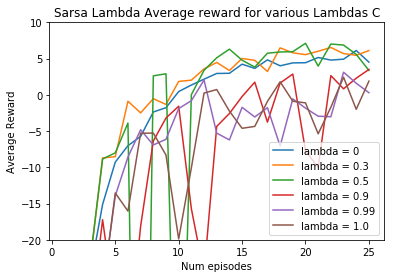

In [23]:
T = []
num_episode=25
for i in range(num_episode):
    T.append(i+1)
plt.title("Sarsa Lambda Average reward for various Lambdas C")
plt.xlabel("Num episodes")
plt.ylabel("Average Reward")
plt.ylim(-20,10)
plt.plot(T,r_sarsal1,label="lambda = 0")
plt.plot(T,r_sarsal2,label="lambda = 0.3")
plt.plot(T,r_sarsal3,label="lambda = 0.5")
plt.plot(T,r_sarsal4,label="lambda = 0.9")
plt.plot(T,r_sarsal5,label="lambda = 0.99")
plt.plot(T,r_sarsal6,label="lambda = 1.0")
plt.legend()
plt.show()

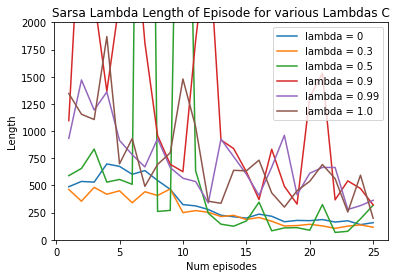

In [24]:
T = []
num_episode=25
for i in range(num_episode):
    T.append(i+1)
plt.title("Sarsa Lambda Length of Episode for various Lambdas C")
plt.xlabel("Num episodes")
plt.ylabel("Length")
plt.ylim(0,2000)
plt.plot(T,l_sarsal1,label="lambda = 0")
plt.plot(T,l_sarsal2,label="lambda = 0.3")
plt.plot(T,l_sarsal3,label="lambda = 0.5")
plt.plot(T,l_sarsal4,label="lambda = 0.9")
plt.plot(T,l_sarsal5,label="lambda = 0.99")
plt.plot(T,l_sarsal6,label="lambda = 1.0")
plt.legend()
plt.show()

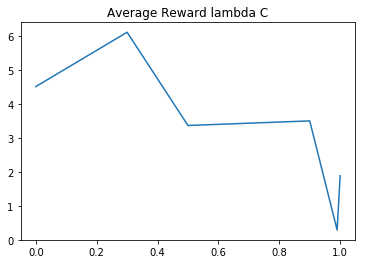

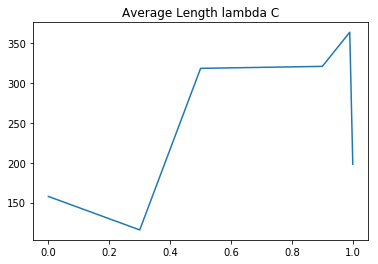

In [41]:
plt.plot([0,0.3,0.5,0.9,0.99,1],[r_sarsal1[24],r_sarsal2[24],r_sarsal3[24],r_sarsal4[24],r_sarsal5[24],r_sarsal6[24]])
plt.title("Average Reward lambda C")
plt.show()
plt.plot([0,0.3,0.5,0.9,0.99,1],[l_sarsal1[24],l_sarsal2[24],l_sarsal3[24],l_sarsal4[24],l_sarsal5[24],l_sarsal6[24]])
plt.title("Average Length lambda C")
plt.show()